In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
col = list(df.columns)
for i in col:
    print(i," ", df['%s' %i].unique())

Age   [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex   ['M' 'F']
ChestPainType   ['ATA' 'NAP' 'ASY' 'TA']
RestingBP   [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol   [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

In [8]:
df.Sex= df.Sex.map(dict(M=1, F=0))
df.ChestPainType = df.ChestPainType.map({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3})
df.RestingECG = df.RestingECG.map({'Normal':0, 'ST':1, 'LVH':2})
df.ExerciseAngina = df.ExerciseAngina.map({'Y':1, 'N':0})
df.ST_Slope = df.ST_Slope.map({'Up':0, 'Flat':1, 'Down':2})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,1.452070,0.851832,0.0,1.00,2.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [10]:
df.iloc[:,-1].value_counts()/len(df)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

as the outputfile fairly close number of classifiation values we can consider as balanced dataset

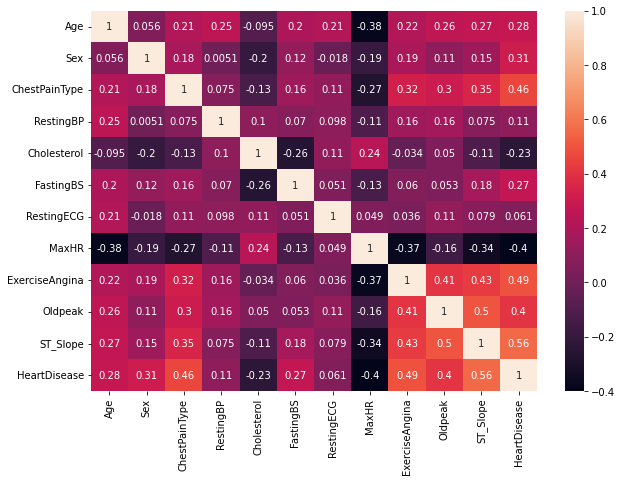

<Figure size 432x288 with 0 Axes>

In [11]:
# To identify the co-relation between the dataset
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
# displaying heatmap
plt.show()
plt.savefig('co-relation')

In [12]:
def ploting(x):
  sns.distplot(df[x], color = 'r').set_title("Distribution Plot")
  plt.show()
  sns.violinplot(x = df[x], palette = 'Accent', split = True).set_title("Violin Plot")
  plt.show()
  sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6).set_title("Box Plot")
  plt.show()
  sns.kdeplot(df[x], cumulative=True).set_title("KDE Plot")
  plt.show()
  plt.figure(figsize=(4,8))
  sns.boxplot(y = x, data = df, width=0.5,showmeans = True).set_title("Box Plot")
  plt.show()
  print('mean of %s is %s' %(x,df[x].mean()))
  print('median of %s is %s' %(x,df[x].median()))
  print('skew of %s is %s' %(x,df[x].skew()))

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


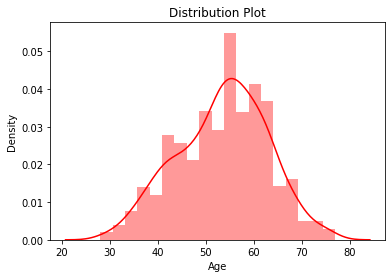

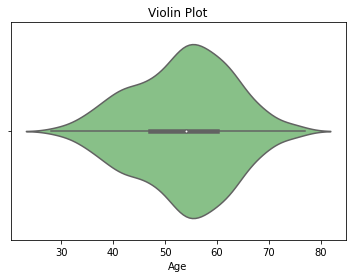

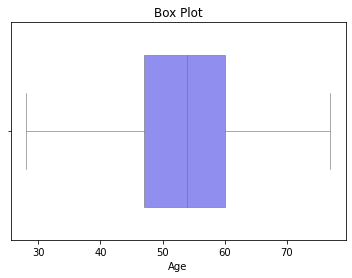

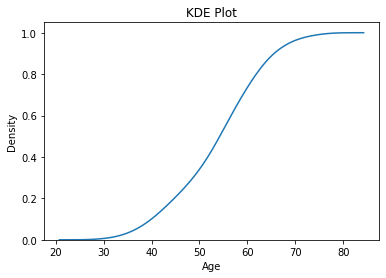

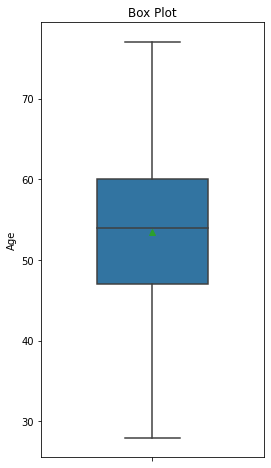

mean of Age is 53.510893246187365
median of Age is 54.0
skew of Age is -0.19593302867569365


In [13]:
ploting('Age')

Age Column is perfectly distributed

In [14]:
'''for col in df.columns:
  Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
  Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
  IQR = Q3 - Q1
  # Upper bound
  upper = np.where(df[col] >= (Q3+1.5*IQR))
  # Lower bound
  lower = np.where(df[col] <= (Q1-1.5*IQR))
  print('for column',col)
  try:
    # Removing the Outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
  except:
    print("No upper or lower outliers")'''

'for col in df.columns:\n  Q1 = np.percentile(df[col], 25,interpolation = \'midpoint\')\n  Q3 = np.percentile(df[col], 75,interpolation = \'midpoint\')\n  IQR = Q3 - Q1\n  # Upper bound\n  upper = np.where(df[col] >= (Q3+1.5*IQR))\n  # Lower bound\n  lower = np.where(df[col] <= (Q1-1.5*IQR))\n  print(\'for column\',col)\n  try:\n    # Removing the Outliers\n    df.drop(upper[0], inplace = True)\n    df.drop(lower[0], inplace = True)\n  except:\n    print("No upper or lower outliers")'

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [16]:
df.shape

(918, 12)

In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X.shape)
print(y.shape)

(918, 11)
(918,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [19]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics

In [20]:
def logReg():
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('===================Logistic Regression===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for Logistic regression is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for Logistic regression is\n',acc)

In [21]:
def navyBais():
    nb = GaussianNB().fit(X_train,y_train)
    y_pred = nb.predict(X_test)
    print('===================Navie Bayes===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for Navie Bayes is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for Navie Bayes is\n',acc)

In [22]:
for i in range(1,10):
    #knn = knc(n_neighbors=2,metric = 'euclidean')
    knn = knc(n_neighbors=i,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for ',i,' is\n',acc)

Accuracy for  1  is
 69.02173913043478
Accuracy for  2  is
 65.21739130434783
Accuracy for  3  is
 70.1086956521739
Accuracy for  4  is
 70.1086956521739
Accuracy for  5  is
 71.73913043478261
Accuracy for  6  is
 72.28260869565217
Accuracy for  7  is
 71.73913043478261
Accuracy for  8  is
 73.36956521739131
Accuracy for  9  is
 76.08695652173914


In [23]:
for i in range(1,10):
    knn = knc(n_neighbors=i,metric = 'euclidean')
    #knn = knc(n_neighbors=i,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for ',i,' is\n',acc)

Accuracy for  1  is
 63.04347826086957
Accuracy for  2  is
 61.95652173913043
Accuracy for  3  is
 67.3913043478261
Accuracy for  4  is
 69.02173913043478
Accuracy for  5  is
 69.02173913043478
Accuracy for  6  is
 69.02173913043478
Accuracy for  7  is
 67.3913043478261
Accuracy for  8  is
 65.21739130434783
Accuracy for  9  is
 68.47826086956522


In [24]:
def knn():
    knn = knc(n_neighbors=6,metric = 'euclidean')
    #knn = knc(n_neighbors=1,metric = 'manhattan')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('===================KNN===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for KNN is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for KNN is\n',acc)   

In [25]:
for i in range(1,10):
    model = SVC(C=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for',i,'is\n',acc)

Accuracy for 1 is
 70.1086956521739
Accuracy for 2 is
 71.19565217391305
Accuracy for 3 is
 71.19565217391305
Accuracy for 4 is
 71.73913043478261
Accuracy for 5 is
 71.19565217391305
Accuracy for 6 is
 72.82608695652173
Accuracy for 7 is
 73.36956521739131
Accuracy for 8 is
 74.45652173913044
Accuracy for 9 is
 74.45652173913044


In [27]:
def svm():
    model = SVC(C=8)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('===================SVM===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for SVM is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for SVM is\n',acc)

In [28]:
for i in range(1,10):
    #dtree = dtc(criterion = 'entropy',max_depth = 3)
    dtree = dtc(criterion = 'gini',max_depth = i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for',i,'is\n',acc)

Accuracy for 1 is
 78.80434782608695
Accuracy for 2 is
 80.97826086956522
Accuracy for 3 is
 82.6086956521739
Accuracy for 4 is
 85.86956521739131
Accuracy for 5 is
 85.32608695652173
Accuracy for 6 is
 83.69565217391305
Accuracy for 7 is
 82.6086956521739
Accuracy for 8 is
 81.52173913043478
Accuracy for 9 is
 81.52173913043478


In [29]:
for i in range(1,10):
    dtree = dtc(criterion = 'entropy',max_depth = i)
    #dtree = dtc(criterion = 'gini',max_depth = i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for',i,'is\n',acc)

Accuracy for 1 is
 78.80434782608695
Accuracy for 2 is
 78.80434782608695
Accuracy for 3 is
 82.6086956521739
Accuracy for 4 is
 86.41304347826086
Accuracy for 5 is
 86.41304347826086
Accuracy for 6 is
 83.69565217391305
Accuracy for 7 is
 83.69565217391305
Accuracy for 8 is
 83.69565217391305
Accuracy for 9 is
 79.8913043478261


In [30]:
def dtree():
    dtree = dtc(criterion = 'entropy',max_depth = 4)
    #dtree = dtc(criterion = 'gini',max_depth = 2)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    print('===================Decision Tree===================')
    cm = metrics.confusion_matrix(y_test,y_pred)
    print('Confusion matrics for Decision Tree is\n',cm)
    acc = metrics.accuracy_score(y_test,y_pred)*100
    print('Accuracy for Decision Tree is\n',acc)

In [31]:
def main():
  logReg()
  navyBais()
  knn()
  svm()
  dtree()

main()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


===================Logistic Regression===================
Confusion matrics for Logistic regression is
 [[68 11]
 [15 90]]
Accuracy for Logistic regression is
 85.86956521739131
===================Navie Bayes===================
Confusion matrics for Navie Bayes is
 [[68 11]
 [17 88]]
Accuracy for Navie Bayes is
 84.78260869565217
===================KNN===================
Confusion matrics for KNN is
 [[62 17]
 [40 65]]
Accuracy for KNN is
 69.02173913043478
===================SVM===================
Confusion matrics for SVM is
 [[59 20]
 [27 78]]
Accuracy for SVM is
 74.45652173913044
===================Decision Tree===================
Confusion matrics for Decision Tree is
 [[62 17]
 [ 8 97]]
Accuracy for Decision Tree is
 86.41304347826086


In [33]:
import joblib

In [34]:
dtree = dtc(criterion = 'entropy',max_depth = 4)
dtree.fit(X_train,y_train)
joblib.dump(dtree, 'model')

['model']

In [36]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [37]:
y=[[48,0,2,138,214,0,0,108,1,1.5,1]]
n=[[37,1,0,130,283,0,1,98,0,0,0]]

In [39]:
solve = joblib.load('model')
res = solve.predict(n)
if res == 0:
    print('No')
else:
    print('Yes')

No


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
